# Projet 5: Segmentez des clients d'un site e-commerce

## Notebook de l'analyse exploratoire

### Importation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from scipy import stats
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

### Importation des données

In [2]:
#importation des données:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

In [3]:
#Fonction d'observation de chaque table. 
'''
Cette fonction affichera pour chaque dataset, les éléments suivants:
- La dimension de la table,
- Le nombre de données manquantes,
- Les nombre de doublons
- le type de variables, 
- les valeurs uniques de chaque variable
- La répartition des valeurs manquantes par variable

'''

def observation(df,name):
    #les dimmensions 
    dimensions= print("la dimension de la table" ,name, "est de", df.shape)
    #les données manquantes 
    NaN=df.isna().sum().sum()
    print("La somme des valeurs manquantes de la table",name, "est de",NaN)
    #les doublons 
    doublons=df.duplicated().sum()
    print('Le nombre de doubons cette table est de ', doublons)
    #tableau qui résume le type de variables, les valeurs uniques et les valeurs manquantes 
    tableau=pd.DataFrame(df.dtypes, columns=['type de variable'])
    tableau['valeurs uniques']=df.nunique()
    tableau['valeurs manquantes']= df.isna().sum()
    return tableau

### Les caractéristiques de la table 'customers'

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
observation(customers, 'customers')

la dimension de la table customers est de (99441, 5)
La somme des valeurs manquantes de la table customers est de 0
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
customer_id,object,99441,0
customer_unique_id,object,96096,0
customer_zip_code_prefix,int64,14994,0
customer_city,object,4119,0
customer_state,object,27,0


In [6]:
# Distributions du nombre de commandes par nombre de clients
# -----------------------------------------------------------------------
nb_client = customers['customer_unique_id'].nunique()
series_commande_par_client = customers.groupby(
    'customer_unique_id').size().value_counts()
df_commandes = pd.DataFrame(
    {'Nb_commandes': series_commande_par_client.index,
     'Nb_clients': series_commande_par_client.values})
df_commandes['%'] = round(
    (df_commandes['Nb_clients'])*100/nb_client, 3)

df_commandes

,Nb_commandes,Nb_clients,%
0,1,93099,96.881
1,2,2745,2.857
2,3,203,0.211
3,4,30,0.031
4,5,8,0.008
5,6,6,0.006
6,7,3,0.003
7,9,1,0.001
8,17,1,0.001


#### Les 10 états avec le plus de clients

<AxesSubplot:title={'center':'Les 10 états avec le plus de clients'}, ylabel='customer_state'>

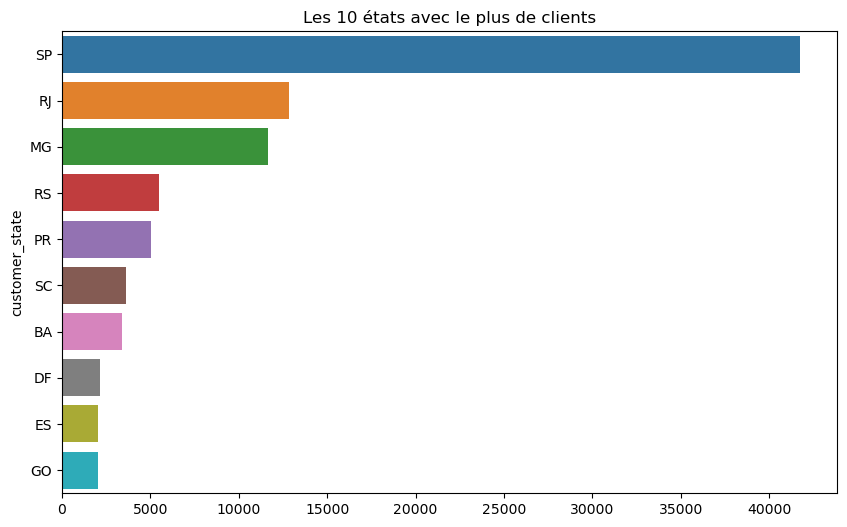

In [7]:
state = customers.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 états avec le plus de clients')
sns.barplot(x = state.values,
           y = state.index)

#### Les 10 villes avec le plus de clients

<AxesSubplot:title={'center':'Les 10 villes avec le plus de clients'}, ylabel='customer_city'>

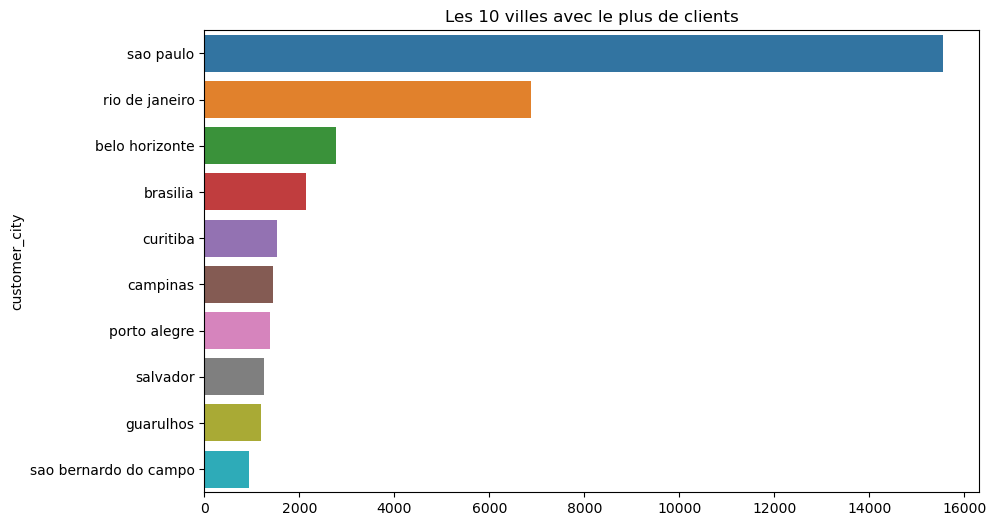

In [8]:
cities = customers.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = cities.values,
           y = cities.index)

### Les caractéristiques de la table 'geolocalisation'

In [9]:
geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
observation(geolocalisation,'geolocalisation')

la dimension de la table geolocalisation est de (1000163, 5)
La somme des valeurs manquantes de la table geolocalisation est de 0
Le nombre de doubons cette table est de  261831


,type de variable,valeurs uniques,valeurs manquantes
geolocation_zip_code_prefix,int64,19015,0
geolocation_lat,float64,717360,0
geolocation_lng,float64,717613,0
geolocation_city,object,8011,0
geolocation_state,object,27,0


In [11]:
#suppression des doublons de la table geolocalisation:
geolocalisation.drop_duplicates(inplace=True)
geolocalisation.shape

(738332, 5)

### Les caractéristiques de la table 'order_items'

In [12]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
observation(order_items,'order_items')

la dimension de la table order_items est de (112650, 7)
La somme des valeurs manquantes de la table order_items est de 0
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
order_id,object,98666,0
order_item_id,int64,21,0
product_id,object,32951,0
seller_id,object,3095,0
shipping_limit_date,object,93318,0
price,float64,5968,0
freight_value,float64,6999,0


### Les caractéristiques de la table 'order_payments'

In [14]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
observation(order_payments,'order_payments')

la dimension de la table order_payments est de (103886, 5)
La somme des valeurs manquantes de la table order_payments est de 0
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
order_id,object,99440,0
payment_sequential,int64,29,0
payment_type,object,5,0
payment_installments,int64,24,0
payment_value,float64,29077,0


#### Répartition des moyens de paiement les plus utilisés par les clients

<AxesSubplot:title={'center':'Répartition des moyens de paiement les plus utilisés par les clients'}, ylabel='payment_type'>

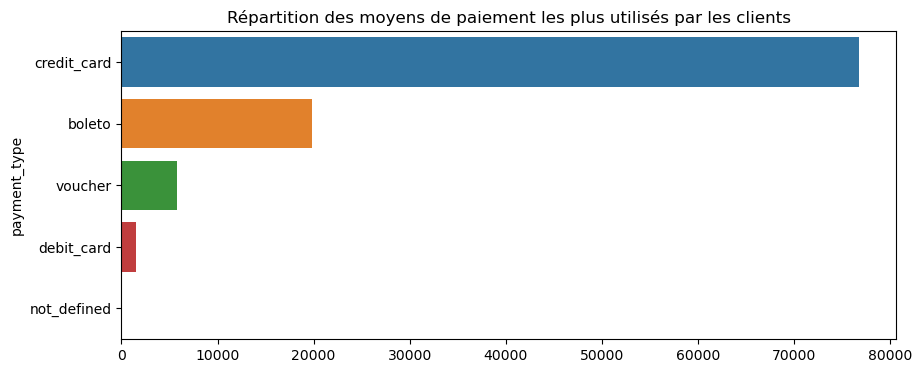

In [16]:
payment = order_payments.groupby(['payment_type']).count()[
    'order_id'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement les plus utilisés par les clients')
sns.barplot(x = payment.values,
           y = payment.index)

### Les caractéristiques de la table 'order_reviews'

In [17]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
observation(order_reviews,'order_reviews')

la dimension de la table order_reviews est de (99224, 7)
La somme des valeurs manquantes de la table order_reviews est de 145903
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
review_id,object,98410,0
order_id,object,98673,0
review_score,int64,5,0
review_comment_title,object,4527,87656
review_comment_message,object,36159,58247
review_creation_date,object,636,0
review_answer_timestamp,object,98248,0


### Les caractéristiques de la table 'orders'

In [19]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
observation(orders,'orders')

la dimension de la table orders est de (99441, 8)
La somme des valeurs manquantes de la table orders est de 4908
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
order_id,object,99441,0
customer_id,object,99441,0
order_status,object,8,0
order_purchase_timestamp,object,98875,0
order_approved_at,object,90733,160
order_delivered_carrier_date,object,81018,1783
order_delivered_customer_date,object,95664,2965
order_estimated_delivery_date,object,459,0


La variable 'order_status' comprend 8 valeurs uniques. Affichons ces différentes valeurs. 

In [21]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [22]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Nous avons plusieurs status de commandes. Pour la suite de notre analyse, nous n'allons selectionner que les commandes qui ont été livrées aux clients 

In [23]:
#selection des commandes 'delivered'
orders=orders[orders['order_status']=='delivered']
orders.shape

(96478, 8)

### Les caractéristiques de la table 'products'

In [24]:
#la table products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
observation(products,'products')

la dimension de la table products est de (32951, 9)
La somme des valeurs manquantes de la table products est de 2448
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
product_id,object,32951,0
product_category_name,object,73,610
product_name_lenght,float64,66,610
product_description_lenght,float64,2960,610
product_photos_qty,float64,19,610
product_weight_g,float64,2204,2
product_length_cm,float64,99,2
product_height_cm,float64,102,2
product_width_cm,float64,95,2


### Les caractéristiques de la table 'sellers'

In [26]:
#table sellers
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
observation(sellers,'sellers')

la dimension de la table sellers est de (3095, 4)
La somme des valeurs manquantes de la table sellers est de 0
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
seller_id,object,3095,0
seller_zip_code_prefix,int64,2246,0
seller_city,object,611,0
seller_state,object,23,0


### Les caractéristiques de la table 'translation'

In [28]:
#la table translation
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
observation(translation,'translation')

la dimension de la table translation est de (71, 2)
La somme des valeurs manquantes de la table translation est de 0
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
product_category_name,object,71,0
product_category_name_english,object,71,0


Tous les fichiers présentés précédemment sont liés les uns aux autres par des colonnes communes.
- order_id,
- product_id,
- seller_id,
- zip_code_prefix,
- customers_id,
- product_category_name. 
Ces colonnes permettrons de faire des jointures.

### Préparation d'un fichier commande par la jointure des différentes tables

In [30]:
# Jointure de customers et orders sur la clé customer_id
data = pd.merge(customers,orders, on='customer_id', how='left')

# jointure de data et data_order_reviews sur la clé "order_id"
data = pd.merge(data, order_reviews, on='order_id', how='left')

# jointure de data et de data_order_payments sur la clé order_id
data = pd.merge(data, order_payments, on='order_id', how='left')

# jointure de data et de data_order_items sur la clé order_id
data = pd.merge(data, order_items, on='order_id', how='left')

# jointure de data et data_products sur la clé product_id
data = pd.merge(data, products, on='product_id', how='left')

#jointure de data et de data_sellers sur la clé seller_id
data = pd.merge(data, sellers, on='seller_id', how='left')


### Les caractéristiques de la table 'data': fichier commandes

In [31]:
observation(data,'data')

la dimension de la table data est de (118686, 39)
La somme des valeurs manquantes de la table data est de 280622
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
customer_id,object,99441,0
customer_unique_id,object,96096,0
customer_zip_code_prefix,int64,14994,0
customer_city,object,4119,0
customer_state,object,27,0
order_id,object,96478,2963
order_status,object,1,2963
order_purchase_timestamp,object,95956,2963
order_approved_at,object,88274,2978
order_delivered_carrier_date,object,80106,2965


In [32]:
table=data.copy()

In [33]:
data.columns.to_list()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

#### Regroupement des produits par catégories uniques 

<AxesSubplot:>

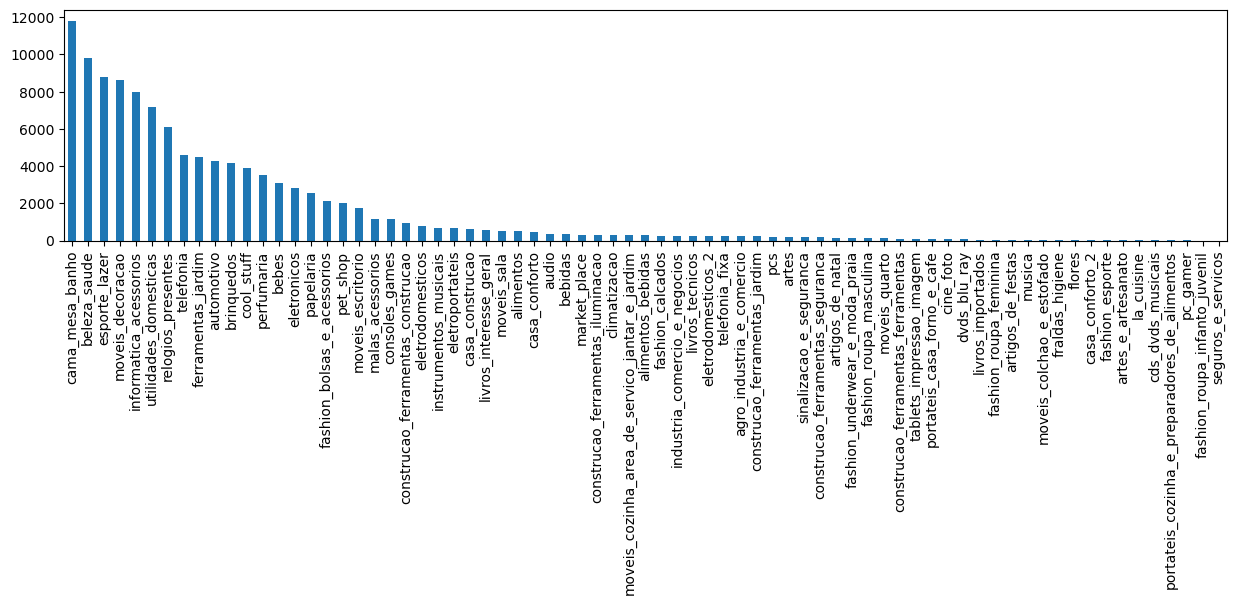

In [34]:
#les catégories de produits
data['product_category_name'].value_counts().plot.bar(figsize=(15,3))


In [35]:
categories = {
    #appliances
    'utilidades_domesticas':'appliances',
    'eletroportateis':'appliances',
    'climatizacao':'appliances',
    'moveis_cozinha_area_de_servico_jantar_e_jardim':'appliances',
    'eletrodomesticos':'appliances',
    'eletrodomesticos_2':'appliances',
    'portateis_casa_forno_e_cafe':'appliances',
    'portateis_cozinha_e_preparadores_de_alimentos':'appliances',

    #beauty
    'beleza_saude':'beauty',
    'perfumaria':'beauty',
    'fraldas_higiene':'beauty',
    
    #culture
    'brinquedos':'culture',
    'livros_tecnicos':'culture',
    'instrumentos_musicais':'culture',
    'artes':'culture',
    'livros_interesse_geral':'culture',
    'livros_importados':'culture',
    'cine_foto':'culture',
    'musica':'culture',
    'cds_dvds_musicais':'culture',
    'dvds_blu_ray':'culture',
    'artes_e_artesanato':'culture',
    
     #fashion
    'bebes':'fashion',
    'fashion_bolsas_e_acessorios':'fashion',
    'fashion_calcados':'fashion',
    'malas_acessorios':'fashion',
    'fashion_roupa_masculina':'fashion',
    'fashion_underwear_e_moda_praia':'fashion',
    'fashion_roupa_feminina':'fashion',
    'fashion_roupa_infanto_juvenil':'fashion',
    'relogios_presentes':'fashion',

    #food
    'alimentos_bebidas':'food',
    'alimentos':'food',
    'bebidas':'food',
    
    #garden
    'ferramentas_jardim':'garden',
    'pet_shop':'garden',
    'flores':'garden',
    
    #home
    'moveis_decoracao':'home',
    'cama_mesa_banho':'home',
    'casa_conforto':'home',
    'moveis_colchao_e_estofado':'home',
    'moveis_sala':'home',
    'moveis_quarto':'home',
    'la_cuisine':'home',
    'casa_conforto_2':'home',
    'artigos_de_festas':'home',
    'artigos_de_natal':'home',

    #office
    'papelaria':'office',
    'moveis_escritorio':'office',

    #other
    'automotivo':'other',
    'cool_stuff':'other',
    'NaN':'other',
     
    #services
    'market_place':'services',
    'agro_industria_e_comercio':'services',
    'industria_comercio_e_negocios':'services',
    'seguros_e_servicos':'services',

    #sports
    'esporte_lazer':'sports',
    'fashion_esporte':'sports',

    #tech
    'informatica_acessorios':'tech',
    'telefonia':'tech',
    'tablets_impressao_imagem':'tech',
    'telefonia_fixa':'tech',
    'consoles_games':'tech',
    'audio':'tech',
    'eletronicos':'tech',
    'sinalizacao_e_seguranca':'tech',
    'pcs':'tech',
    'pc_gamer':'tech',
    
    #tools
    'construcao_ferramentas_construcao':'tools',
    'construcao_ferramentas_jardim':'tools',
    'construcao_ferramentas_ferramentas':'tools',
    'casa_construcao':'tools',
    'construcao_ferramentas_iluminacao':'tools',
    'construcao_ferramentas_seguranca':'tools',
    
    #no_name
    'no_name':'no_name'
}

In [36]:
# Remplacement des anciennes catégories par les nouvelles
data['product_new_category_name'] = data['product_category_name'].astype('object')
data['product_new_category_name'] = data['product_new_category_name'].replace(categories, regex=False)

In [37]:
columns=data.columns.to_list()

#### Représentation des catégories de produits

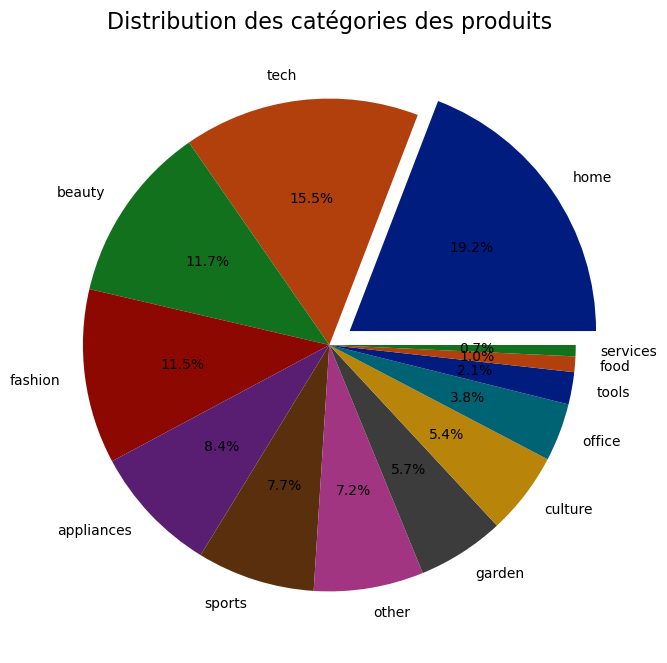

In [38]:
# Pieplot de représentation des catégories de produits
colors_niveau = sns.color_palette('dark')
plt.figure(figsize=(15, 8))
plt.title('Distribution des catégories des produits', size=16)
nb_par_var = data['product_new_category_name'].sort_values().value_counts()
#nb_par_var = nb_par_var.loc[sorted(nb_par_var.index)]
explode = [0.1]
for i in range(len(nb_par_var) - 1):
        explode.append(0)
wedges, texts, autotexts = plt.pie(
        nb_par_var, labels=nb_par_var.index, autopct='%1.1f%%',colors=colors_niveau  , explode=explode)

#### Regroupement des états en régions

In [39]:
#Regroupement des états en régions
dict_regions = {
    
    "DF": "centre_ouest",
    "GO": "centre_ouest",
    "MS": "centre_ouest",
    "MT": "centre_ouest",
    
    "AL": "nord_est",
    "BA": "nord_est",
    "CE": "nord_est",
    "MA": "nord_est",
    "PE": "nord_est",
    "PB": "nord_est",
    "PI": "nord_est",
    "RN": "nord_est",
    "SE": "nord_est",
    
    
    "AC": "nord", 
    "AM": "nord",
    "AP": "nord",
    "PA": "nord",
    "RO": "nord",
    "RR": "nord",
    "TO": "nord",
    
    "ES": "sud_est",
    "MG": "sud_est",
    "RJ": "sud_est",
    "SP": "sud_est",
    
    "PR": "sud",
    "RS": "sud",
    "SC": "sud",
    
}

# Remplacement des noms d'états par leur région respective
data['customer_state'] = data['customer_state'].replace(dict_regions)
data['seller_state'] = data['seller_state'].replace(dict_regions)
# Modification des noms de colonnes
data.rename(columns={'customer_state':'region'},inplace=True)
data.rename(columns={'seller_state':'seller_region'},inplace=True)

###  Démarche de Nettoyage

Supprimons dans un premier temps, certaines colonnes que l'on trouve non pertinantes pour notre analyse:
'review_comment_title','review_creation_date','review_answer_timestamp','review_cmment_message','product_category_name','product_name_lenght','product_description_lenght','seller_zip_code_prefix','order_status'


In [40]:
# regroupement des noms de colonnes à supprimer dans une liste
columns_to_drop =['review_comment_title','review_creation_date','review_answer_timestamp','review_comment_message','product_category_name','product_name_lenght','product_description_lenght','seller_zip_code_prefix','order_status']
# Suppression des colonnes appartenant à liste
data= data.drop(columns_to_drop, axis=1)

In [41]:
observation(data,'data')

la dimension de la table data est de (118686, 31)
La somme des valeurs manquantes de la table data est de 82153
Le nombre de doubons cette table est de  0


,type de variable,valeurs uniques,valeurs manquantes
customer_id,object,99441,0
customer_unique_id,object,96096,0
customer_zip_code_prefix,int64,14994,0
customer_city,object,4119,0
region,object,5,0
order_id,object,96478,2963
order_purchase_timestamp,object,95956,2963
order_approved_at,object,88274,2978
order_delivered_carrier_date,object,80106,2965
order_delivered_customer_date,object,95658,2971


#### Les valeurs manquantes 

In [42]:
# demarche de nettoyage des NaN
def nan(data):
    data=data.dropna(subset=['order_item_id','payment_sequential','review_id','product_weight_g'])
    data['product_new_category_name'].fillna('Unknow', inplace=True)
    data['product_photos_qty'].fillna(0, inplace=True)
    data['order_delivered_customer_date'].fillna(1, inplace=True)
    data['order_delivered_carrier_date'].fillna(1, inplace=True)
    data['order_approved_at'].fillna(1, inplace=True)
    return data 

In [43]:
#NaN
data=nan(data)

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\2637446358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_new_category_name'].fillna('Unknow', inplace=True)
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\2637446358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_photos_qty'].fillna(0, inplace=True)
C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\2637446358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [44]:
data.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
region                           0
order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_city         

#### Transformation de certaines variables en type 'datetime'

In [45]:
cols = ['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
       'shipping_limit_date',]
for col in cols:
    data[col] = pd.to_datetime(data[col], format='%Y-%m-%d %H:%M:%S')

In [46]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
region                                   object
order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                            float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetim

In [47]:
#selection des variables quantitatives et catégorielles 
cont_feats = data.select_dtypes(include='number').columns.tolist()
cat_feats = data.select_dtypes(include='object').columns.tolist()
print("les variables numériques sont: ",  cont_feats)
print("les variables categorielles sont: ",cat_feats)
cont_feats.remove( 'customer_zip_code_prefix')

les variables numériques sont:  ['customer_zip_code_prefix', 'review_score', 'payment_sequential', 'payment_installments', 'payment_value', 'order_item_id', 'price', 'freight_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
les variables categorielles sont:  ['customer_id', 'customer_unique_id', 'customer_city', 'region', 'order_id', 'review_id', 'payment_type', 'product_id', 'seller_id', 'seller_city', 'seller_region', 'product_new_category_name']


In [48]:
#fonction de suppression des outliers 
def del_outliers(df, cols):
    temp = df.copy()
    i_outliers = [] #list of indexs for each column
    outliers = [] #list with all the indexs
    for col in cols:
        i_outliers.append(temp[temp[col] > temp[col].quantile(0.99)].index.tolist())
        i_outliers.append(temp[temp[col] < temp[col].quantile(0.01)].index.tolist())

    for i_col in i_outliers:
        for i in i_col:
            outliers.append(i)
        
    temp[temp.index.isin(outliers)] = np.nan #convert the outliers into nan
    return temp.dropna() #drop the rows with the nan (outliers)



In [49]:
#les caractéristiques des variables quantitatives 
data[cont_feats].describe()

,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000,114839.000000
mean,4.080513,1.091554,2.937904,171.259780,1.194603,119.772739,19.975368,2.175986,2103.585550,30.227423,16.572010,23.059675
std,1.347583,0.688882,2.773813,263.730071,0.685763,181.357323,15.704394,1.725758,3769.509751,16.113059,13.417478,11.727709
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,4.000000,1.000000,1.000000,60.730000,1.000000,39.900000,13.080000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,1.000000,2.000000,108.000000,1.000000,74.900000,16.280000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,1.000000,4.000000,188.720000,1.000000,132.900000,21.150000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,26.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Feature engineering de création de features par client

#### - Nombre de commandes par client

In [50]:
#nombre de commande par client
commande_par_client = pd.DataFrame(data.groupby(["customer_unique_id"])["order_id"].nunique())

commande_par_client.rename(columns={"order_id": "nombre_commande"}, inplace=True)

data = pd.merge(data,commande_par_client, on='customer_unique_id', how='inner')
data.shape

(114839, 32)

#### La repartition du nombre de commandes par client

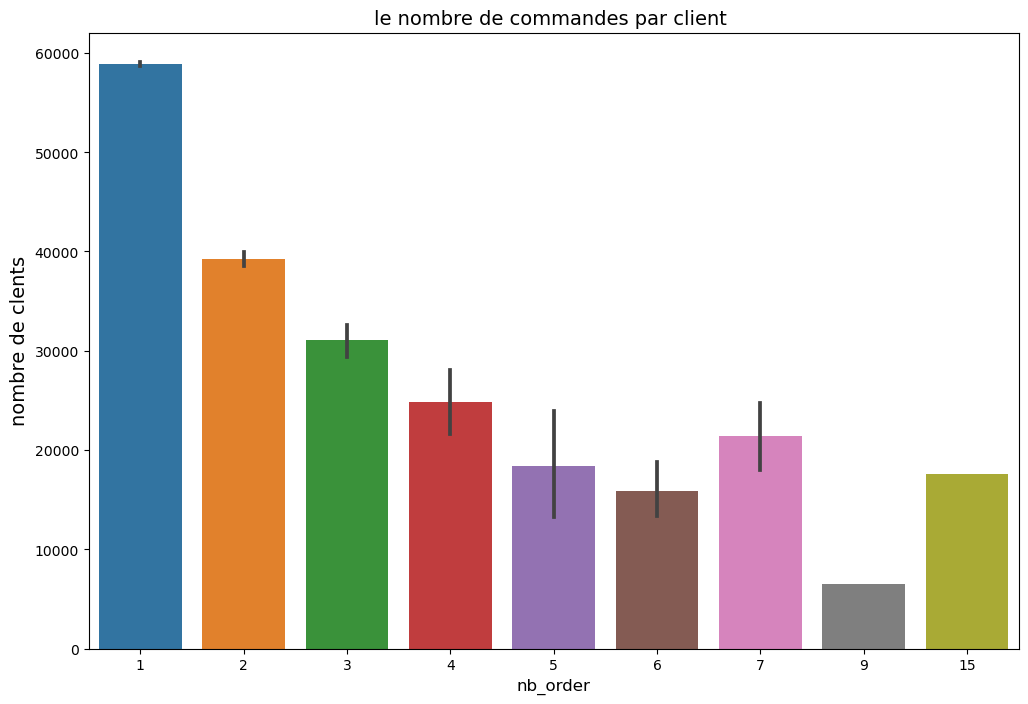

In [51]:
# barplot nombre de commandes par client
plt.figure(figsize=(12, 8))
sns.barplot(y=data.nombre_commande.index, x= data.nombre_commande.values,capsize=None)
plt.title('le nombre de commandes par client ',fontsize =14 )
plt.ylabel('nombre de clents',fontsize=14)
plt.xlabel('nb_order',fontsize=12)
plt.show()

#### - Nombre de produits par client

In [52]:
#Nombre de produits par client
nb_product = pd.DataFrame(data.groupby('customer_unique_id')['product_id'].count())
nb_product.rename(columns={'product_id':'nombre_produits' }, inplace=True)

data = pd.merge(data,nb_product, on='customer_unique_id', how='inner')

#### - Le panier moyen par client

In [53]:
# Panier moyen
panier_moyen = data.groupby('customer_unique_id')['payment_value'].mean()
data['panier_moyen'] = data['customer_unique_id'].map(panier_moyen)

#### - la catégorie la plus achetée par client

In [54]:
#la catégorie la plus achetée
best_category = pd.DataFrame(data.sort_values(
        ['customer_unique_id','product_new_category_name'], ascending=False).groupby(
        ['customer_unique_id','product_new_category_name']).head()[[
        'customer_unique_id', 'product_new_category_name']])

best_category.set_index('customer_unique_id', inplace=True)
best_category.columns = ['best_category']

data = pd.merge(data,best_category, on='customer_unique_id', how='left')
data.shape

(184768, 35)

#### - Moyen de paiement préféré par le client

In [55]:
# Moyen de paiement préféré
df_moy_paiement = data[['customer_unique_id', 'payment_type']] \
    .sort_values(['customer_unique_id', 'payment_type'],
                 ascending=False).groupby(
    ['customer_unique_id', 'payment_type']).head(1)[
    ['customer_unique_id', 'payment_type']]
# Renommer la variable en moyen_paiement_prefere
df_moy_paiement.rename(
    columns={'payment_type': 'moyen_paiement_prefere'}, inplace=True)
# Merge avec dataframe date pour ajouter la variable
data = pd.merge(data, df_moy_paiement, on='customer_unique_id',
                how='left')
data.shape

(206831, 36)

#### - Moyenne du nombre des échéances de paiement

In [57]:
# Moyenne du nombre des échéances de paiement
s_echeance_mean = round((data.groupby('customer_unique_id')[
    'payment_installments'].mean()),2)
data['echeances'] = data['customer_unique_id'].map(
    s_echeance_mean)

#### - Montant total des frais des port 

In [58]:
# Montant total des frais des port 
freight_tot_value= pd.DataFrame(data.groupby(
        ['customer_unique_id'])['freight_value'].sum())

freight_tot_value.columns=['frais_de_port']

data = pd.merge(data,freight_tot_value, on='customer_unique_id', how='inner')

#### - Delais de livraison

In [59]:
#delais de livraison
# création de la colonne délais de livraison (delivry_delay)
data["delivery_delay"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])

#### - Note moyenne des commentaires 

In [60]:
#Note moyenne des commentaires 
review_mean_score = round((pd.DataFrame(data.groupby('customer_unique_id')['review_score'].mean())),2)

review_mean_score.rename(columns={'review_score':'review_mean_score'},inplace=True)

data=pd.merge(data,review_mean_score, on='customer_unique_id', how='left')

#### - Le volume en Cm3 par produit

In [61]:
# volume = height*lenght*width
data["product_volume_cm3"] = data["product_length_cm"] \
                               * data["product_height_cm"] \
                               * data["product_width_cm"]

#### - La date du dernier achat

In [62]:
# Période de commande
min = data['order_purchase_timestamp'].min().strftime('%d/%m/%Y %Hh%m')
max = data['order_purchase_timestamp'].max().strftime('%d/%m/%Y %Hh%m')
print(f'Période d\'achat : du {min} au {max}')

Période d'achat : du 03/10/2016 09h10 au 29/08/2018 15h08


In [63]:
#date du dernier achat
import datetime
date_ref = data['order_purchase_timestamp'].max() + \
    datetime.timedelta(days=1)
s_dateref = date_ref.strftime('%d/%m/%Y %Hh%m')
print(f'Data de référence pour la récence : {s_dateref}')

Data de référence pour la récence : 30/08/2018 15h08


In [64]:
date_dernier_achat = data.groupby('customer_unique_id')[
    'order_purchase_timestamp'].max()
data['dernier_achat'] = data['customer_unique_id'] \
    .map(date_dernier_achat)


#### Création de variables pour la segmentation RFM

La segmentation RFM vise à connaître les comportements d’achat de la clientèle existante et éventuellement à prédire leurs comportements ainsi que celui des prospects. Les trois paramètres retenus sont les suivants :

- Récence : la date du dernier achat. On part du principe qu’une personne qui a acheté récemment chez vous a plus de chances de revenir commander chez vous.

- Fréquence : le nombre d’achats réalisé sur une période donnée. Plus un client achète régulièrement chez vous, plus il y a de chances pour qu’il achète à nouveau. On analyse ici son niveau de fidélité.

- Montant : la somme des achats cumulés sur une période donnée. Les gros acheteurs répondent mieux que les petits. On mesure ici la valeur client.

In [65]:
#Selection des variables qui nous permettrons de creer les nouvelles variables RFM
feats_to_rfm=['customer_unique_id','order_purchase_timestamp','order_id','payment_value']
df_rfm=data[feats_to_rfm]

In [66]:
rfm_data=df_rfm.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (date_ref - x.max()).days, # Recence
                                                'order_id': lambda x: len(x.unique()), # Frequence
                                                'payment_value': lambda x: x.sum()})    # Montant

rfm_data['order_purchase_timestamp'] = rfm_data['order_purchase_timestamp'].astype(int)

rfm_data.rename(columns={'order_purchase_timestamp': 'rfm_recence', 
                         'order_id': 'rfm_frequence',
                         'payment_value': 'rfm_montant'}, inplace=True)
rfm_data.head()

,rfm_recence,rfm_frequence,rfm_montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [67]:
# Ajout des  indicateurs RFM au dataframe de travail global
data = pd.merge(data, rfm_data, on='customer_unique_id', how='left')
data.shape

(206831, 45)

In [68]:
#suppression des doublons
data.drop_duplicates(inplace=True)
data.shape

(128661, 45)

In [69]:
data.duplicated(['order_id']).sum()

32846

In [70]:
data.drop_duplicates(subset='order_id',keep = 'first',inplace=True)
data.shape

(95815, 45)

#### Création du fichier clients

In [71]:
#creation du dataset clients 
dico_aggr = {'region': lambda x: x.mode()[0],
             'customer_city' : lambda x: x.mode()[0],
             'rfm_recence': 'mean',
             'rfm_frequence': 'mean',
             'rfm_montant': 'mean',
             'review_mean_score':'mean',
             'nombre_produits': 'mean',
             'nombre_commande': 'mean',
             'panier_moyen':'mean',
             'echeances': 'mean',
             'moyen_paiement_prefere': lambda x: x.mode()[0],
             'best_category':lambda x: x.mode()[0],
             'order_purchase_timestamp': lambda x: x.mode()[0],
             'dernier_achat':lambda x: x.mode()[0],
             }

In [72]:
df_c=data.copy()

In [73]:
df_c = df_c.groupby(['customer_unique_id']).agg(dico_aggr)

In [74]:
df_clients=df_c.copy()
df_clients.head()

,region,customer_city,rfm_recence,rfm_frequence,rfm_montant,review_mean_score,nombre_produits,nombre_commande,panier_moyen,echeances,moyen_paiement_prefere,best_category,order_purchase_timestamp,dernier_achat
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,sud_est,cajamar,112.0,1.0,141.90,5.0,1.0,1.0,141.90,8.0,credit_card,home,2018-05-10 10:56:27,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,sud_est,osasco,115.0,1.0,27.19,4.0,1.0,1.0,27.19,1.0,credit_card,beauty,2018-05-07 11:11:27,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,sud,sao jose,537.0,1.0,86.22,3.0,1.0,1.0,86.22,8.0,credit_card,office,2017-03-10 21:05:03,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,nord,belem,321.0,1.0,43.62,4.0,1.0,1.0,43.62,4.0,credit_card,tech,2017-10-12 20:29:41,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,sud_est,sorocaba,288.0,1.0,196.89,5.0,1.0,1.0,196.89,6.0,credit_card,tech,2017-11-14 19:45:42,2017-11-14 19:45:42


In [75]:
df_clients.describe()

,rfm_recence,rfm_frequence,rfm_montant,review_mean_score,nombre_produits,nombre_commande,panier_moyen,echeances
count,92741.000000,92741.000000,92741.000000,92741.000000,92741.000000,92741.000000,92741.000000,92741.000000
mean,237.755416,1.033146,419.084465,4.153387,1.238276,1.033146,157.538764,2.898306
std,152.574607,0.208358,3051.594738,1.280534,0.845803,0.208358,215.700169,2.674948
min,1.000000,1.000000,10.070000,1.000000,1.000000,1.000000,1.856818,0.000000
25%,114.000000,1.000000,65.000000,4.000000,1.000000,1.000000,60.690000,1.000000
50%,219.000000,1.000000,117.730000,5.000000,1.000000,1.000000,103.550000,2.000000
75%,346.000000,1.000000,233.920000,5.000000,1.000000,1.000000,174.430000,4.000000
max,695.000000,15.000000,546563.200000,5.000000,75.000000,15.000000,13664.080000,24.000000


On remarque la présence sur le tableau describe,la présence d'outliers correspondants aux max de certaines variables: 'rfm_montant' par exemple

In [76]:
print(df_clients.loc[df_clients['rfm_montant'].idxmax()])

region                                  sud_est
customer_city                    rio de janeiro
rfm_recence                               334.0
rfm_frequence                               1.0
rfm_montant                            546563.2
review_mean_score                           1.0
nombre_produits                             8.0
nombre_commande                             1.0
panier_moyen                           13664.08
echeances                                   1.0
moyen_paiement_prefere              credit_card
best_category                              tech
order_purchase_timestamp    2017-09-29 15:24:52
dernier_achat               2017-09-29 15:24:52
Name: 0a0a92112bd4c708ca5fde585afaa872, dtype: object


In [77]:
print(df_clients.loc[df_clients['echeances'].idxmax()])

region                                 nord_est
customer_city                            iguatu
rfm_recence                               275.0
rfm_frequence                               1.0
rfm_montant                              325.37
review_mean_score                           4.0
nombre_produits                             1.0
nombre_commande                             1.0
panier_moyen                             325.37
echeances                                  24.0
moyen_paiement_prefere              credit_card
best_category                              tech
order_purchase_timestamp    2017-11-27 22:35:44
dernier_achat               2017-11-27 22:35:44
Name: 0e9e4d1bdc6bfbb9646cb1ecf19d696f, dtype: object


In [78]:
#suppression des outliers de nos tables
df_clients=del_outliers(df_clients,['rfm_montant','echeances','nombre_produits'])

In [79]:
data=del_outliers(data,['rfm_montant','echeances','nombre_produits'])

In [80]:
df_clients.describe()

,rfm_recence,rfm_frequence,rfm_montant,review_mean_score,nombre_produits,nombre_commande,panier_moyen,echeances
count,90248.000000,90248.000000,90248.000000,90248.000000,90248.000000,90248.000000,90248.000000,90248.000000
mean,238.029984,1.028344,260.182044,4.161059,1.176048,1.028344,153.150918,2.868986
std,152.467552,0.175053,463.357710,1.274048,0.483405,0.175053,193.003887,2.583815
min,1.000000,1.000000,22.840000,1.000000,1.000000,1.000000,4.795000,1.000000
25%,114.000000,1.000000,65.297500,4.000000,1.000000,1.000000,61.590000,1.000000
50%,219.000000,1.000000,116.940000,5.000000,1.000000,1.000000,103.525000,2.000000
75%,346.000000,1.000000,225.190000,5.000000,1.000000,1.000000,172.751250,4.000000
max,695.000000,4.000000,5264.000000,5.000000,4.000000,4.000000,4764.340000,10.000000


## Analyse exploratoire 

In [81]:
#selection des variables quantitatives et catégorielles 
cont_feats = df_clients.select_dtypes(include='number').columns.tolist()
cat_feats = df_clients.select_dtypes(include='object').columns.tolist()
print("les variables numériques sont: ",  cont_feats)
print("les variables categorielles sont: ",cat_feats)

les variables numériques sont:  ['rfm_recence', 'rfm_frequence', 'rfm_montant', 'review_mean_score', 'nombre_produits', 'nombre_commande', 'panier_moyen', 'echeances']
les variables categorielles sont:  ['region', 'customer_city', 'moyen_paiement_prefere', 'best_category']


### La distribution des variables continues 

In [82]:
#fonction de calcul de skew et de réalisation de displot
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution de ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


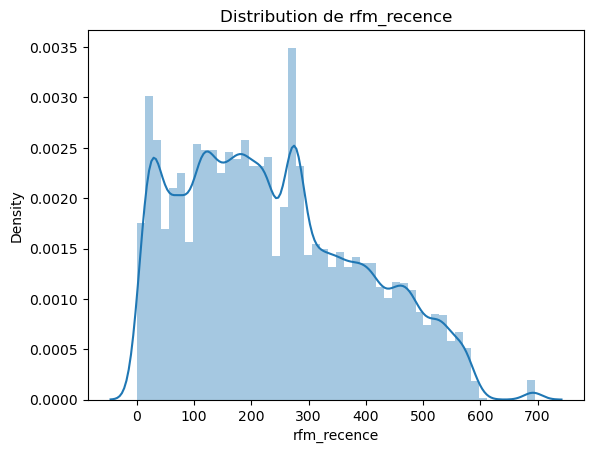

rfm_recence's: Skew: 0.44337291191045225, : SkewtestResult(statistic=52.0117852299677, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


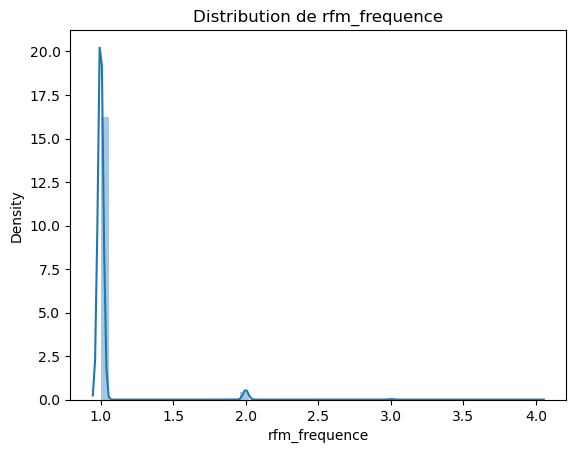

rfm_frequence's: Skew: 6.653060657085462, : SkewtestResult(statistic=279.9006312293998, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


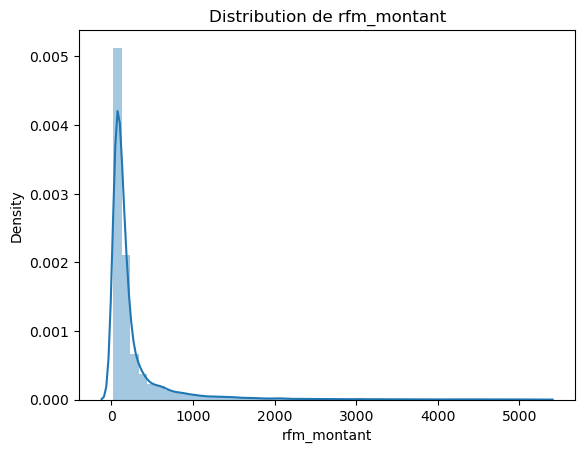

rfm_montant's: Skew: 4.953213252245081, : SkewtestResult(statistic=250.64844258402928, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


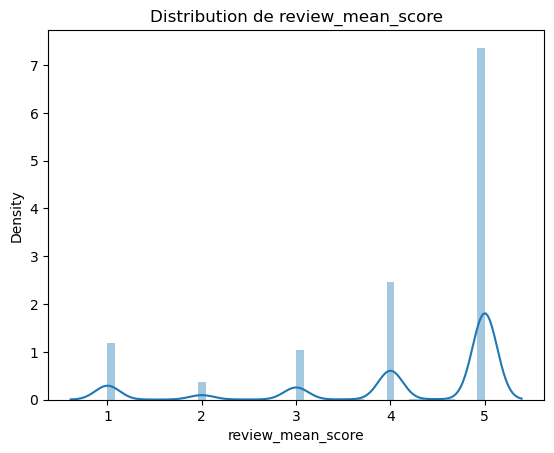

review_mean_score's: Skew: -1.4917408633973954, : SkewtestResult(statistic=-136.55308038573426, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


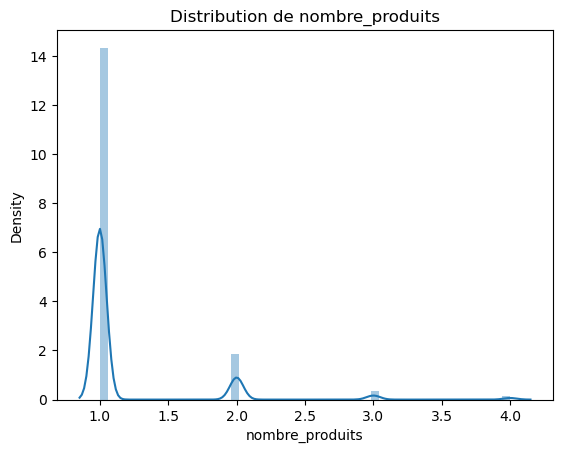

nombre_produits's: Skew: 3.195620239384827, : SkewtestResult(statistic=207.67613863286488, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


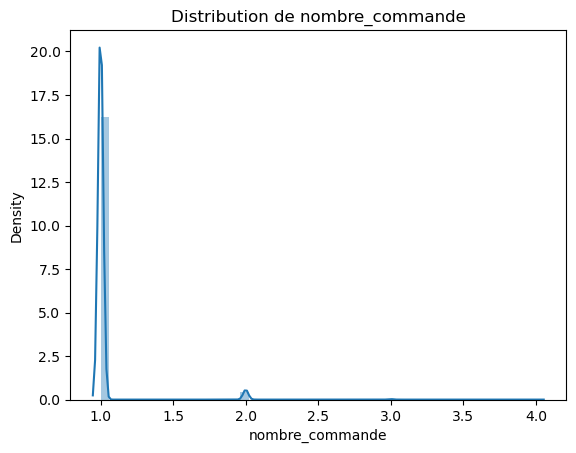

nombre_commande's: Skew: 6.653060657085462, : SkewtestResult(statistic=279.9006312293998, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


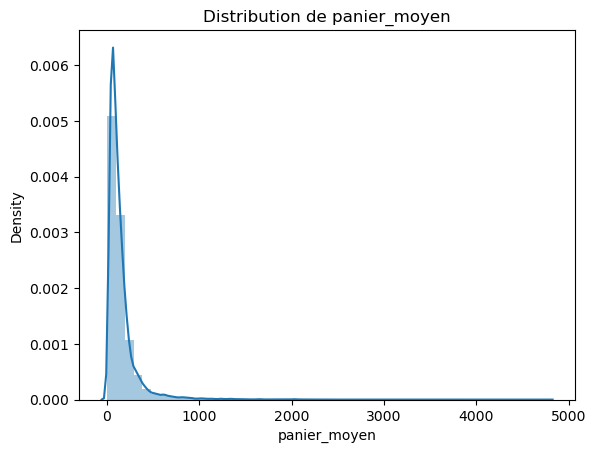

panier_moyen's: Skew: 6.401017541555289, : SkewtestResult(statistic=276.06244789518803, pvalue=0.0)


C:\Users\mr_ar\AppData\Local\Temp\ipykernel_6100\42103479.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


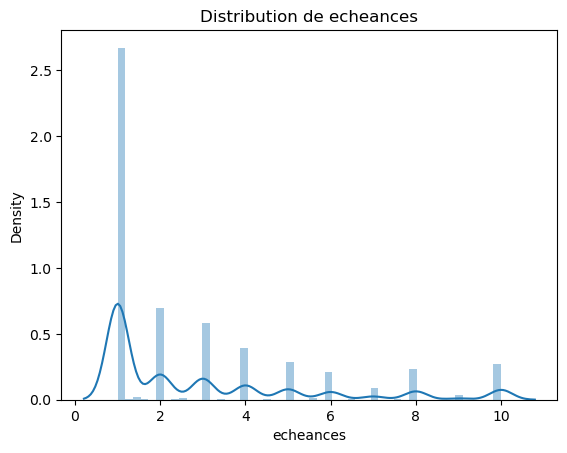

echeances's: Skew: 1.4479044241923023, : SkewtestResult(statistic=133.94176233192252, pvalue=0.0)


In [83]:
for col in cont_feats:
    check_skew(df_clients, col)

On remarque nos variables continues sont anormalements distribuées.

### Les Boxplot des variables continues 

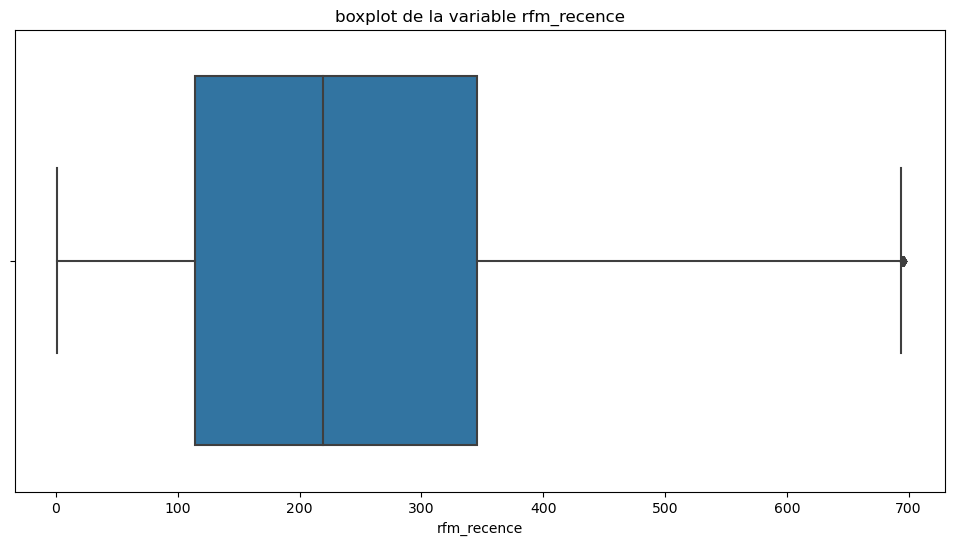

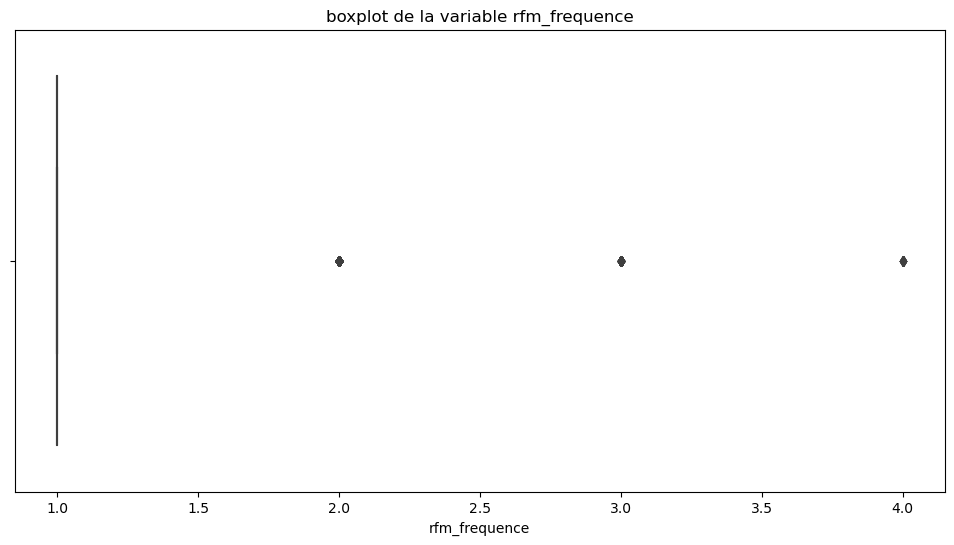

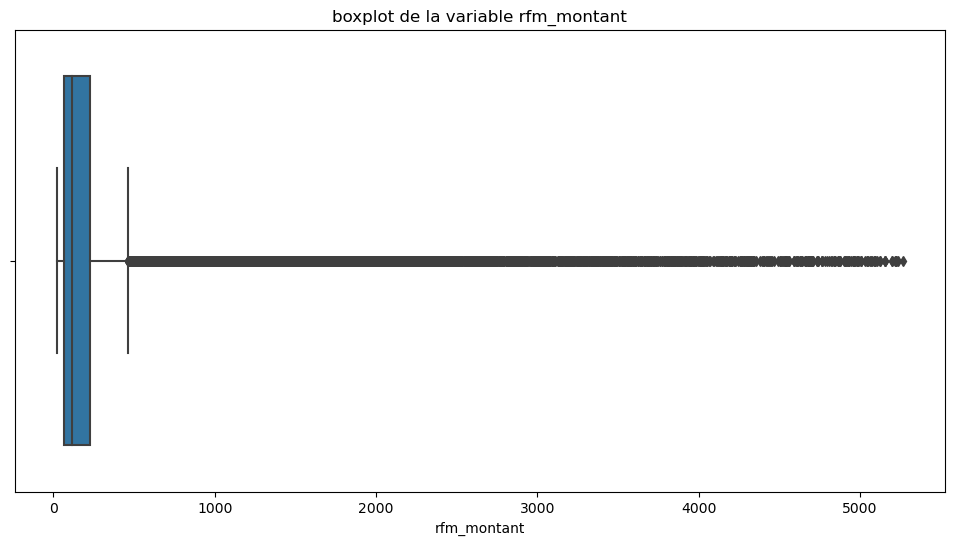

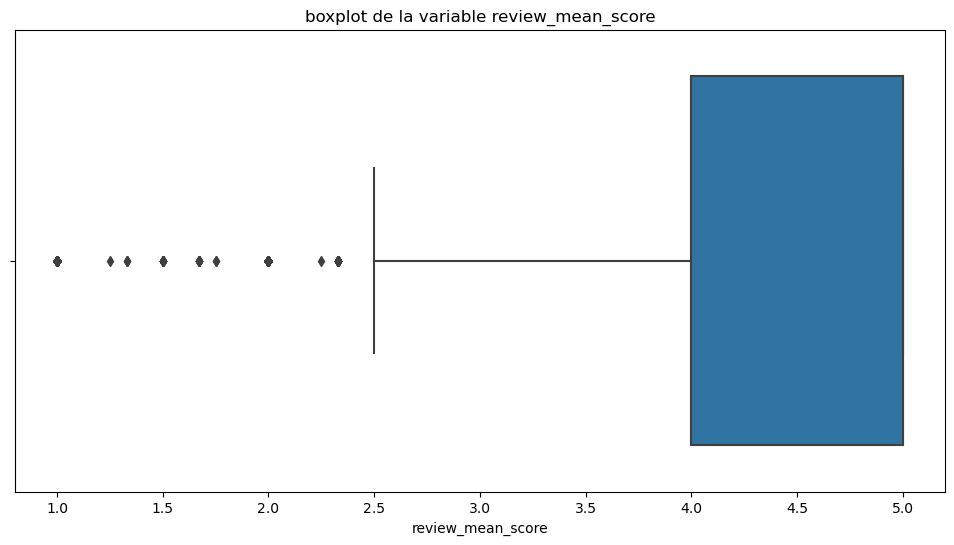

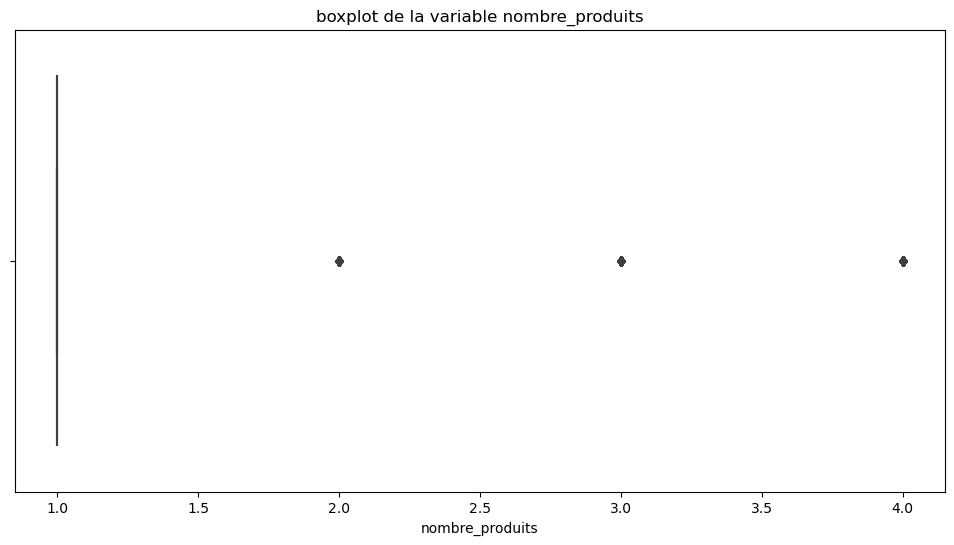

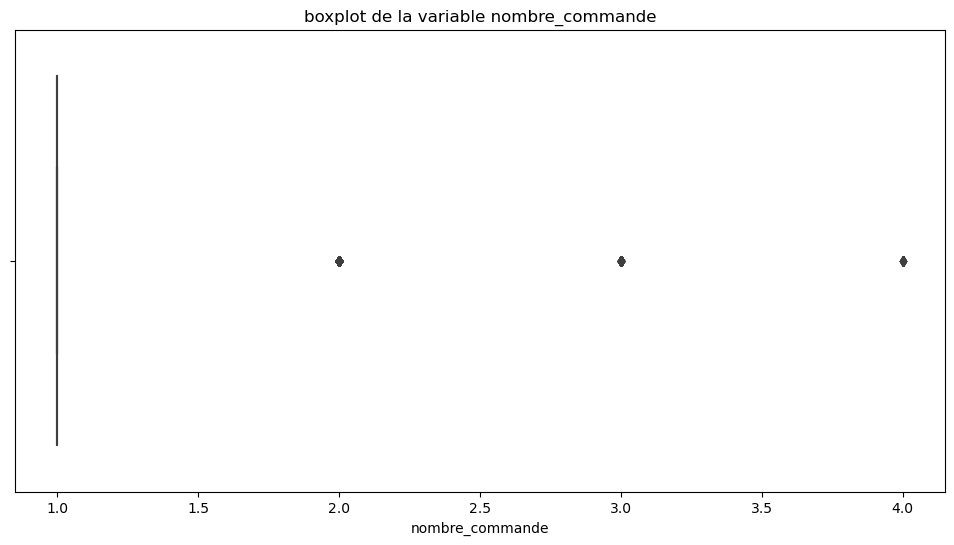

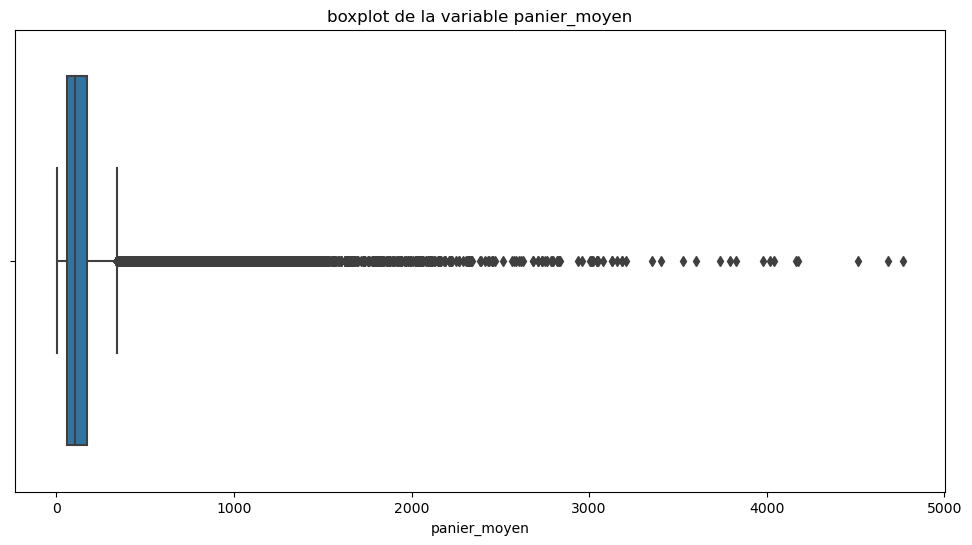

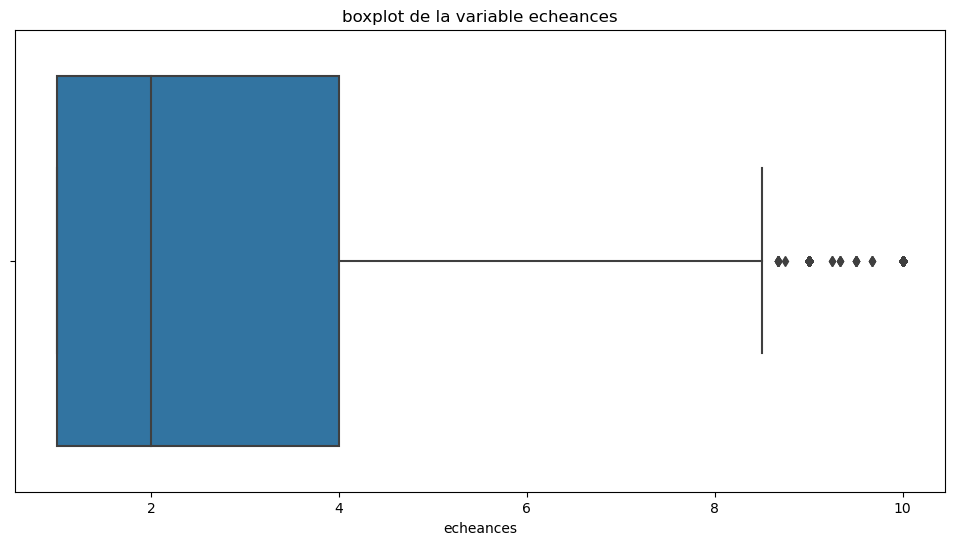

In [84]:
for col in cont_feats:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df_clients[col]).set_title("boxplot de la variable " +col)

### La matrice de correlation 

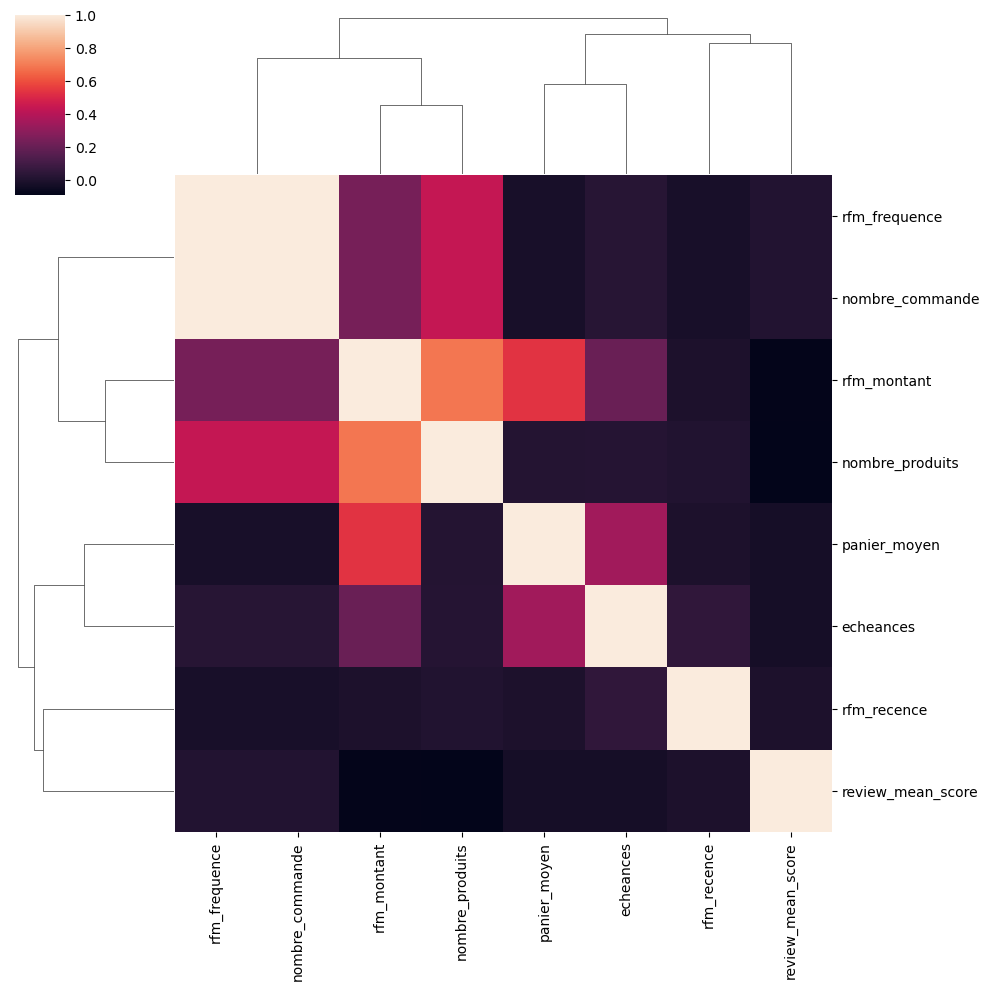

In [85]:
sns.clustermap(df_clients[cont_feats].corr())

In [86]:
#Export des fichiers
df_clients.to_csv('df_clients.csv')
rfm_data.to_csv('rfm_data.csv')
data.to_csv('data_clients.csv',index=False)